In [99]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import time
import random
from sklearn.linear_model import LinearRegression
import copy
import cellbell
from tqdm.auto import tqdm
import seaborn as sb
import matplotlib.pyplot as plt

In [204]:
proxies_list = open("rotating_proxies_list.txt", "r").read().strip().split("\n")

In [41]:
dfGames = pd.DataFrame()
teamsDf = pd.read_csv('data/teams_csv.csv')
allTeams = teamsDf.copy(deep=True)
# teamsDf = teamsDf.dropna()
teamsDf.head(10)

,Rk,School,"City, State",From,To,Yrs,G,W,L,W-L%,SRS,SOS,AP,CREG,CTRN,NCAA,FF,NC
0,1,Abilene Christian,"Abilene, Texas",1971,2023,13,389,210,179,0.540,-8.02,-5.91,0,0,2,2.0,0.0,0.0
1,2,Air Force,"USAF Academy, Colorado",1958,2023,66,1812,785,1027,0.433,-2.77,1.33,0,1,0,4.0,0.0,0.0
2,3,Akron,"Akron, Ohio",1902,2023,72,1683,1003,680,0.596,-0.06,-1.54,0,9,5,5.0,0.0,0.0
3,4,Alabama A&M,"Normal, Alabama",2000,2023,24,688,265,423,0.385,-16.70,-11.21,0,1,1,1.0,0.0,0.0
4,5,Alabama,"Tuscaloosa, Alabama",1913,2023,110,2859,1769,1089,0.619,7.77,4.83,17,12,9,24.0,0.0,0.0
5,6,Alabama State,"Montgomery, Alabama",1983,2023,41,1208,561,647,0.464,-13.29,-9.99,0,4,4,4.0,0.0,0.0
6,7,Albany-ny,"Albany, New York",2000,2023,24,736,354,382,0.481,-7.10,-5.96,0,2,5,5.0,0.0,0.0
7,8,Alcorn State,"Alcorn State, Mississippi",1978,2023,46,1360,593,767,0.436,-13.49,-8.73,0,12,6,6.0,0.0,0.0
8,9,Allegheny,"Meadville, Pennsylvania",1896,1916,21,234,191,41,0.823,NaN,NaN,0,0,0,NaN,NaN,NaN
9,10,American,"Washington, D.C.",1967,2023,57,1607,786,821,0.489,-5.78,-3.90,0,7,3,3.0,0.0,0.0


In [42]:
def getLinksForSchools():
    schools_link = 'https://www.sports-reference.com/cbb/schools/'
    page = requests.get(schools_link)
    soup = BeautifulSoup(page.content, "html.parser")
    school_table = soup.find(attrs={"id": "NCAAM_schools"})
    school_rows = school_table.find_all('tr')
    counter = 1
    links = []
    sr_base = 'https://www.sports-reference.com'
    for row in school_rows:
        if row.find('td') == None:
            continue

        to_date = row.find(attrs={'data-stat': 'year_max'}).getText()
    #     print(int(to_date) == 2023)
        td = row.find('td')
    #     print(td.a['href'])
    #     print(td.getText())
#         if counter in teamsDf['Rk'] and int(to_date) == 2023:
        links.append(sr_base + td.a['href'])
    #         print(teamsDf.loc[teamsDf['index'] == counter])
    #         teamsDf.loc[teamsDf['index'] == counter]['link'] = td.a['href']

        counter += 1
    
    return links

In [43]:
teamsDf['link'] = getLinksForSchools()
teamsDf = teamsDf.dropna()
URL = "https://www.sports-reference.com/cbb/boxscores/index.cgi?month=1&day=14&year=2011"
baseUrl = "https://www.sports-reference.com/cbb/boxscores/index.cgi?"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
sports_reference_base = 'https://www.sports-reference.com/'

# columns = ['']


teamsDf.dropna()
notCurrent = teamsDf[teamsDf['To'] != 2023.0].index
teamsDf.drop(notCurrent)
# print(len(teamsDf))
teamsDf = teamsDf.reset_index()
# teamsDf.drop(columns=['index'])
teamsDf['School'] = teamsDf['School'].apply(str.lower)
teamsDf.tail()

# unis = ['college','university','a&m','tech','dickinson','international','gulf','coast','coastal','pacific','atlantic','state','of','new','jersey','charleston','school','mines','mercy','eastern','east','central','center','western','west','north','northern','middle','south','southern']

# for row in teamsDf.iterrows():
#     names = row['School'].split(' ')
#     if

# result = soup.find_all('div', class_='game_summary')
# result = soup.findAll(True, {'class':['game_summary', 'gender-m']})
# result = soup.select(".game_summary.gender-m")
# print(len(result))
# for r in result:
#     newr = r.find('a',href=lambda text: 'boxscores' in text)
#     print(newr["href"])
# # print(result)

,index,Rk,School,"City, State",From,To,Yrs,G,W,L,W-L%,SRS,SOS,AP,CREG,CTRN,NCAA,FF,NC,link
388,485,486,wright state,"Dayton, Ohio",1988,2023,36,1096,613,483,0.559,-1.36,-2.53,0,4,4,4.0,0.0,0.0,https://www.sports-reference.com/cbb/schools/w...
389,486,487,wyoming,"Laramie, Wyoming",1905,2023,118,2844,1594,1250,0.560,2.75,2.71,4,21,3,16.0,1.0,1.0,https://www.sports-reference.com/cbb/schools/w...
390,487,488,xavier,"Cincinnati, Ohio",1920,2023,102,2663,1595,1068,0.599,5.99,3.90,13,18,9,29.0,0.0,0.0,https://www.sports-reference.com/cbb/schools/x...
391,488,489,yale,"New Haven, Connecticut",1896,2023,128,3053,1543,1507,0.506,-6.14,-4.51,1,16,2,6.0,0.0,0.0,https://www.sports-reference.com/cbb/schools/y...
392,489,490,youngstown state,"Youngstown, Ohio",1948,2023,43,1260,508,752,0.403,-8.18,-3.48,0,1,0,0.0,0.0,0.0,https://www.sports-reference.com/cbb/schools/y...


In [44]:
def check_links_work():
    all_work = True
    count = 0
    tot = 1
    proxy = random.choice(proxies_list)
    bad_teams = []
    for team in teamsDf['School']:
        if count == 20:
            print('iters: ' + str(tot) + ', on ' + teamsDf.iloc[tot]['School'])
    #         time.sleep(61)
            count = 0
    #         proxy = random.choice(proxies_list)
        try:
    #         baseUrl = "https://www.sports-reference.com/cbb/schools/"+ str(team).strip().replace(' ','-').replace('&','') + '/men/2022.html'
            baseUrl = teamsDf['link'][tot]
            ua = UserAgent(use_external_data=False)
            header = {'User-Agent':str(ua.random)}
            page = requests.get(baseUrl, headers=header, timeout=30)
    #         page = requests.get(baseUrl, proxies={'http': f"http://{proxy}"}, timeout=30, headers=header)
        except Exception as e:
            print(e)

        if page.status_code == 429:
            print('429')
            return False
        elif page.status_code != 200:
            print(team + ', link: ' + teamsDf['link'][tot])
            return False

#         print(team, page.status_code)
        time.sleep(4)
        count += 1
        tot += 1
        
    return True

In [45]:
# check_links_work()

In [297]:
# gender = 'men' or 'women'
def iterTeams(years, teams, df):
    counter = 0
    #for each month, date, and year get all games
    baseUrl = "https://www.sports-reference.com/cbb/schools/"
    ua = UserAgent(use_external_data=True)
    header = {'User-Agent':str(ua.random)}
#     years = [2000]
    tq_years = tqdm(years,position=0, leave=True)
    for year in years:
        count = 0
        tq_teams = tqdm(teams,position=0, leave=True)
#         with tqdm(teams, position=0, leave=True) as iterator:
        for team in tq_teams:
            team_info = teamsDf[teamsDf['School'] == team].iloc[0]
            if (team_info['From'] > year) or (team_info['To'] < year):
                continue
                
            if (team_info['School'] == 'brown' and year == 2021):
                continue

            url = team_info['link'] + str(year) + '.html'
            try:
                page = requests.get(url, headers=header)
            except Exception as e:
                counter = 0
                while page.status_code >= 400:
                    try:
                        proxy = random.choice(proxies_list)
                        ua = UserAgent(use_external_data=True)
                        header = {'User-Agent':str(ua.random)}
        #                 page = requests.get(url,headers=header)
                        page = requests.get(baseUrl, proxies={'http': f"http://{proxy}"}, timeout=30, headers=header)
                    except Exception as e:
                        if counter > 6:
                            print('Error: ' + str(e))
                            return
                    counter += 1

            soup = BeautifulSoup(page.content, "html.parser")
            print(str(page.status_code) + ': ' + team)
            try:
                page = requests.get(url)
            except Exception as e:
                ua = UserAgent(use_external_data=True)
                header = {'User-Agent':str(ua.random)}
                page = requests.get(url,headers=header)

            if page.status_code >= 400:
                print(team_info['School'] + ' (' + str(year) + '), ' + 'errored with status code: ' + str(page.status_code))
                continue
                
            ivys = ['brown','columbia','cornell','dartmouth','harvard','pennsylvannia','princeton','yale']
            if not (team in ivys and year == 2021):
#             if True:
#                 try:
#                     df,error = getSeasonStats(soup,df,team,year,team_info)
#                     historics = ['W-L%','CREG','AP','CTRN', 'NCAA','FF', 'NC']
#                     for col in historics:
#         #                 print(team_info[col])
#                         df['h_'+col] = float(team_info[col])
#                 except Exception as e:
#                     print('error on ' + team + ', ' + str(e))
                df,error = getSeasonStats(soup,df,team,year,team_info)
                time.sleep(4)
#             for link in links:
#                 getGameData(link,df)
                
    return df
                


    
"""
getSeasonStats 
    takes in (soup) all divs corresponding to games for one day 
    and the gender of the athletes (either and 'm' or 'f') and gets 
    the links to the box score for each game
"""

def getSeasonStats(soup, df, team, season, team_info):
    record = soup.find(string=lambda text: 'Record:' in text).parent.parent.getText()
    df1 = {}
    df1['Team'] = [team]
    df1['Season'] = [season]
    
    # record scraping: get wins, losses, conference wins/losses and win %, conference win %
    record = record.strip().replace(u"\xa0",u"")
    if 'Overall W-L adjusted to ' in record:
        replace_str = 'Overall' + record.split('(')[0].split('Overall')[1]
        record = record.replace(replace_str,'')
        
    if 'in' in record:
        split_rec = record.split(':')[1].strip().split('-')
        wins = split_rec[0]
        df1['Ws'] = [float(wins)]
        par_split_rec = split_rec[1].split('(')
        df1['Ls'] = [float(par_split_rec[0])]
        df1['W%'] = [df1['Ws'][0]/(df1['Ws'][0]+df1['Ls'][0])]
        if par_split_rec[1] != 'Independent)':
        # conference wins
            df1['cWs'] = [float(par_split_rec[1])]
            com_split_rec = split_rec[2].split(', ')
            df1['cLs'] = [float(com_split_rec[0])]
            df1['cW%'] = [df1['cWs'][0]/(df1['cWs'][0]+df1['cLs'][0])]
            cstand = ''
            for c in com_split_rec[1]:
                if c.isnumeric():
                    cstand += c
                else:
                    break

            df1['cStand'] = [float(cstand)]
            
    else:
        split_rec = record.split(':')[1].strip().split('-')
        wins = split_rec[0]
        df1['Ws'] = [float(wins)]
        par_split_rec = split_rec[1].split('(')
        df1['Ls'] = [float(par_split_rec[0])]
        df1['W%'] = [df1['Ws'][0]/(df1['Ws'][0]+df1['Ls'][0])]

    conf = soup.find(string=lambda text: 'Record:' in text).parent.parent
    conf_link = conf.a['href'].strip().replace(u"\xa0",u"")
    conf_split = conf_link.split('/')
    curr = ''
    for x in conf_split:
        if curr == 'conferences':
            # could also x.replace('-',' ') but either works
            df1['Conference'] = x
            break
        curr = x
        
    
        
        
    
#     statsDfPG = getStatLine(soup,'PS/G')
#     statsDfPA = getStatLine(soup,'PA/G')

    stat_cols = ['PS/G','PA/G','SRS','SOS','ORtg','DRtg']
    for stat in stat_cols:
        col = getStatLine(soup, stat)
        if col != None:
            df1.update(col)
    
    
    playerStats = getPlayerStats(soup)
    df1.update(playerStats)
    
    pergames = getPerGameStats(soup)
    df1.update(pergames)
    
    
    tourney = getTourneyResults(soup)
    df1.update(tourney)
    
    historics = ['W-L%','CREG','AP','CTRN', 'NCAA','FF', 'NC']
    for col in historics:
        df1['h_'+col] = float(team_info[col])
    
    
    df_new = pd.DataFrame.from_dict(df1)
    
    
    df = pd.concat([df,df_new], ignore_index=True)
    
    return df,''




def getStatLine(soup, check_string):
    df1 = {}
    if soup.find(string=lambda text: check_string in text) == None:
        return
    elif soup.find(string=lambda text: check_string in text).parent == None:
        return
    
    stat = soup.find(string=lambda text: check_string in text).parent.parent
    while not '<p>' in str(stat):
        stat = stat.parent
        
    stat = stat.getText()
    stat = stat.strip().replace(u"\xa0",u"")
    split_stat = stat.split(':')[1].strip().split(' ')
    df1[check_string] = [float(split_stat[0])]
    stat_rank = ''
    for c in split_stat[1][1:]:
        if c.isnumeric():
            stat_rank += c
        else:
            break
            
    df1[check_string+'_rank'] = [float(stat_rank)]
    
    return df1



# averageheight is in inches
def getPlayerStats(soup):
    df1 = {}
    stats = ['class','pos','height','summary']
    class_dict = {'FR':1,'SO':2,'JR':3,'SR':4}
    roster = soup.find('table', attrs={'id': 'roster'})
    roster_trs = roster.find_all('tr')
    counter = 1
    mean = lambda curr,val,size: curr + ((val-curr)/size)
    df1['AvgClass'] = 0
    df1['AvgHeight'] = 0
    for tr in roster_trs[1:]:
        new_cl = tr.find(attrs={'data-stat':'class'}).getText()
        if new_cl == None or new_cl == '':
            continue
        # could also use int(new_cl['csk']) and remove getText()
        df1['AvgClass'] = mean(df1['AvgClass'],class_dict[new_cl],counter)
        
        new_h = tr.find('td',attrs={'data-stat':'height'}).getText().split('-')
        # could also use float(new_h['csk']) and remove getText().split('-')
        if new_h == None or tr.find('td',attrs={'data-stat':'height'}).getText() == '':
            continue
        
        curr_h = float(new_h[0])*12 + float(new_h[1])
        df1['AvgHeight'] = mean(df1['AvgHeight'],curr_h,counter)
        
#         summary = tr.find('td',attrs={'data-stat':'summary'}).getText().split(',')
#         print(summary)
        
        counter += 1
    
    return df1




def getPerGameStats(soup):
    df1 = {}
    stats = ['fga_per_g','fg_pct','fg2a_per_g','fg3a_per_g','fg3_pct','fta_per_g','ft_pct','orb_per_g','drb_per_g','ast_per_g','stl_per_g','blk_per_g','tov_per_g','pf_per_g']
    oppstats = ['opp_'+x for x in stats]
    pergames = soup.find('table', attrs={'id': 'season-total_per_game'})
    pergames_trs = pergames.find('tbody').find_all('tr')
    pergames_data = pergames.find('tbody')
    for stat in stats:
        if pergames_data.find(attrs={'data-stat':stat}) == None:
            continue
        st = pergames_data.find_all(attrs={'data-stat':stat})
        if st != None:
            df1[stat] = float(st[0].getText())
            df1[stat+'_rank'] = float(st[1].getText()[:-2])
    for stat in oppstats:
        if pergames_data.find(attrs={'data-stat':stat}) == None:
            continue
        st = pergames_data.find_all(attrs={'data-stat':stat})
        if st != None:
            df1[stat] = float(st[0].getText())
            df1[stat+'_rank'] = float(st[1].getText()[:-2])
    
    
    return df1


def getTourneyResults(soup):
    expected = {1: 4, 2: 3, 3: 2, 4: 2, 5: 1, 6: 1, 7: 1, 8: 1}
    for i in range(9,17):
        expected[i] = 0
    df1 = {}
    meta = soup.find('div',attrs={'id': 'meta'})
    made = meta.find('a', text='NCAA Tournament')
    if made == None:
        df1['madeTourney'] = 0
        df1[''] = None
        return df1
    
    tourny_info = made.parent.parent.getText()
    df1['madeTourney'] = 1
    lines = tourny_info.split('\n')
    seed_map = {}
    seed = False
    game = False
    wins = 0
#     avg_margin = 0
    df1['didUpset'] = 0
    for line in lines:
        if line == '':
            continue
        elif line == 'NCAA Tournament:':
            seed = True
        elif seed:
            seeding,wscore,lscore = getSeeding(line)
            df1['vsExpected'] = (-1)*(expected[seeding])
            df1['TourneySeed'] = seeding
            if 'Lost' in line:
                if seeding < 9:
                    df1['wasUpset'] = (17-(2*seeding))
                else:
                    df1['wasUpset'] = 0
                    df1['vsExpected'] = 0
                    
            elif 'Won' in line:
                if seeding > 9:
                    df1['didUpset'] += 1
                else:
                    df1['vsExpected'] += 1
                
            seed = False
            game = True
        elif game:
            wasUpset,didUpset,won,opp_seed = getTourneyGame(line,seeding)
            if won:
                df1['vsExpected'] += 1
            elif not won:
                if df1['vsExpected'] >= 0:
                    df1['wasUpset'] = 0
            if wasUpset:
                if df1['vsExpected'] < 0:
                    df1['wasUpset'] = opp_seed - seeding
                else:
                    df1['wasUpset'] = 0
            elif didUpset:
                df1['didUpset'] += 1
                
    if df1['vsExpected'] == 0:     
        df1['outperformed'] = 0
        df1['underperformed'] = 0
        df1['asExpected'] = 1
    elif df1['vsExpected'] > 0:     
        df1['outperformed'] = 1
        df1['underperformed'] = 0
        df1['asExpected'] = 0
    elif df1['vsExpected'] < 0:     
        df1['outperformed'] = 0
        df1['underperformed'] = 1
        df1['asExpected'] = 0
    
    return df1


def getSeeding(line):
    line_new = line.split(' ')
    seed_found = False
    for word in line_new:
        if '#' in word and seed_found == False:
            seed = float(word.split('#')[1])
            seed_found = True
        elif '-' in word:
            score = word.split('-')
            scores = [float(score[0][1:]),float(score[1][:-1])]
            w_score = max(scores)
            l_score = min(scores)
            break
#             w_score = float(score[0][1:])
#             l_score = float(score[1][:-1])
            
    return seed,w_score,l_score


def getTourneyGame(line,seed):
    line_new = line.split(' ')
    opp_seed = 0
    wasUpset = False
    won = False
    didUpset = False
    for word in line_new:
        if '#' in word:
            opp_seed = float(word.split('#')[1])
        elif '-' in word:
            score = word.split('-')
            scores = [float(score[0][1:]),float(score[1][:-1])]
            w_score = max(scores)
            l_score = min(scores)
            break
    
    if 'Lost' in line:
        won = False
        if seed < opp_seed:
            wasUpset = True
    elif 'Won' in line:
        won = True
        if seed > opp_seed:
            didUpset = True
        
            
    return wasUpset,didUpset,won,opp_seed



def getStreak(num_games,link):
    df1 = {}
    return df1



# df = pd.DataFrame()
# df = iterTeams([2011], ['florida'], df)

In [298]:
dfTest = pd.DataFrame()
dfTest = iterTeams([2021], ['columbia'], dfTest)
# print(teamsDf[teamsDf['School'] == 'colgate'].index)
# print(teamsDf.iloc[67])
# print(dfTest[['h_W-L%']])
dfTest

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

200: columbia


""


In [208]:
print(len(df.columns))

96


In [148]:
# url = 'https://www.sports-reference.com/cbb/schools/florida/men/2000.html'
# page = requests.get(url)
# soup = BeautifulSoup(page.content, "html.parser")
# meta = soup.find('div',attrs={'id': 'meta'})
# # print(meta)
# a = meta.find('a', text='NCAA Tournament')
# b = a.parent.parent.getText()
# print(b)

In [213]:
teams = teamsDf['School'].values.tolist()
# teams = ['florida']
# print(teams)
df10 = pd.DataFrame()
try:
    df10 = iterTeams([2010], teams, df10)
except Exception as e:
    %ding
    print(e)

%ding


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

404: abilene christian
abilene christian (2010), errored with status code: 404
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: centenary
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: college of cha

[[18.         16.          0.52941176 ...  0.          0.
   1.        ]
 [28.          8.          0.77777778 ...  1.          0.
   0.        ]
 [30.          6.          0.83333333 ...  0.          0.
   1.        ]
 ...
 [24.          9.          0.72727273 ...  0.          1.
   0.        ]
 [26.          9.          0.74285714 ...  0.          0.
   1.        ]
 [26.          9.          0.74285714 ...  1.          0.
   0.        ]]
[ 0.  1.  0.  4.  0. -1.  1.  2.  0.  0.  0. -2.  0.  0.  0. -3.  0. -1.
  0.  0. -1. -1.  3.  0.  0.  0.  0.  0. -1. -1.  0.  0.  2. -1.  0.  0.
 -1. -1.  0. -1.  0. -1.  0.  1.  0.  0.  0. -2. -1.  2.  0. -1.  0.  0.
  0. -2.  0. -2.  1.  1.  1.  0. -1.  0.  1.]
[ 1.98435255e-01  1.89829510e-01 -1.11776467e-02 -3.03959456e-01
 -3.33677228e-01 -2.48589194e-03  2.53369642e-01  5.20263720e-03
 -5.99481778e-03 -7.49287401e-02  1.98884602e-02 -3.60122681e-01
 -4.09896130e-02 -3.63404082e-01 -1.15731949e-02 -3.72867888e-01
 -2.43057685e-03 -3.70608925e-0

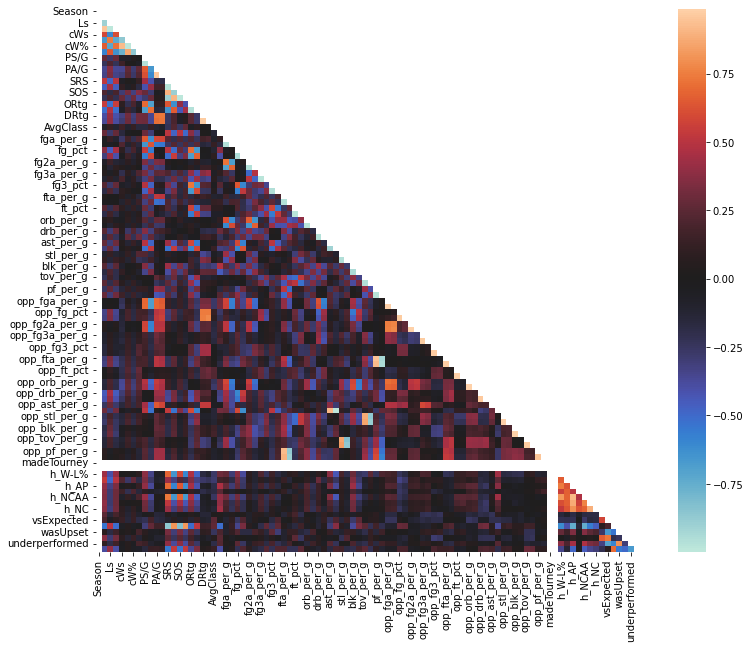

In [182]:
dfTourney = df.loc[df['madeTourney'] == 1]
dfT1 = dfTourney.fillna(0)


cols = list(dfT1.columns.copy().values)
lr_cols = copy.deepcopy(cols)
cols_to_remove = ['Team','Season','vsExpected','Conference']
for col in cols_to_remove:
    lr_cols.remove(col)
# lr_cols.remove('outperformed')
X = dfT1[lr_cols].to_numpy()
print(X)

y = dfT1['vsExpected']
print(y.values)

mlr = LinearRegression()
 
# Fit the model to the data
mlr.fit(X, y)

print(mlr.coef_)

fig, ax = plt.subplots(figsize=(14,10))
corri = dfT1.corr()
mask = np.triu(np.ones_like(corri))
sb.heatmap(corri, mask=mask,center=0,
            fmt='.2f', square=True)
plt.show()

In [183]:
dfAll = df.replace(np.nan, 0)
# print(dfAll.columns)
# dfAll = df.copy(deep=True)

cols = list(dfAll.columns.copy().values)
lr_cols = copy.deepcopy(cols)
cols_to_remove = ['Team','Season','madeTourney','Conference','didUpset', 'vsExpected', 'TourneySeed', 'wasUpset','outperformed', 'underperformed', 'asExpected']
for col in cols_to_remove:
    lr_cols.remove(col)
# lr_cols.remove('outperformed')
X = dfAll[lr_cols].to_numpy()
print(X)

y = dfAll['madeTourney']
print(y.values)

mlr = LinearRegression()
 
# Fit the model to the data
mlr.fit(X, y)

print(mlr.coef_)

sb_cols = copy.deepcopy(lr_cols)
sb_cols.append('madeTourney')

# fig, ax = plt.subplots(figsize=(16,12))
# corri = dfAll[sb_cols].corr()
# mask = np.triu(np.ones_like(corri))
# sb.heatmap(corri, mask=mask,center=0,
#             fmt='.2f', square=True)
# plt.show()


[[10.         21.          0.32258065 ...  4.          0.
   0.        ]
 [24.         11.          0.68571429 ...  5.          0.
   0.        ]
 [11.         16.          0.40740741 ...  1.          0.
   0.        ]
 ...
 [26.          9.          0.74285714 ... 29.          0.
   0.        ]
 [12.         19.          0.38709677 ...  6.          0.
   0.        ]
 [ 8.         22.          0.26666667 ...  0.          0.
   0.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 

In [214]:
teams = teamsDf['School'].values.tolist()
# teams = ['florida']
# print(teams)
df11 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2011]
try:
    df11 = iterTeams(seasons_arr, teams, df11)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

404: abilene christian
abilene christian (2011), errored with status code: 404
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: centenary
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland

In [192]:
df.tail()

,Team,Season,Ws,Ls,W%,cWs,cLs,cW%,cStand,Conference,...,h_NCAA,h_FF,h_NC,didUpset,vsExpected,TourneySeed,wasUpset,outperformed,underperformed,asExpected
340,wright state,2011,19.0,14.0,0.575758,10.0,8.0,0.555556,5.0,horizon,...,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,wyoming,2011,10.0,21.0,0.322581,3.0,13.0,0.187500,8.0,mwc,...,16.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,xavier,2011,24.0,8.0,0.750000,15.0,1.0,0.937500,1.0,atlantic-10,...,29.0,0.0,0.0,0.0,-1.0,6.0,5.0,0.0,1.0,0.0
343,yale,2011,15.0,13.0,0.535714,8.0,6.0,0.571429,3.0,ivy,...,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,youngstown state,2011,9.0,21.0,0.300000,2.0,16.0,0.111111,9.0,horizon,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
time.sleep(4)
df12 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2012]
try:
    df12 = iterTeams(seasons_arr, teams, df12)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

404: abilene christian
abilene christian (2012), errored with status code: 404
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coa

In [216]:
time.sleep(4)
df13 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2013]
try:
    df13 = iterTeams(seasons_arr, teams, df13)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

404: abilene christian
abilene christian (2013), errored with status code: 404
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coa

In [217]:
time.sleep(4)
df14= pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2014]
try:
    df14 = iterTeams(seasons_arr, teams, df14)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: college of charleston
20

In [218]:
time.sleep(4)
df15 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2015]
try:
    df15 = iterTeams(seasons_arr, teams, df15)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: college of charleston
20

In [220]:
time.sleep(4)
df16 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2016]
try:
    df16 = iterTeams(seasons_arr, teams, df16)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: college of charleston
20

In [221]:
time.sleep(4)
df17 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2017]
try:
    df17 = iterTeams(seasons_arr, teams, df17)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: college of charleston
20

In [251]:
time.sleep(4)
df18 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2018]
try:
    df18 = iterTeams(seasons_arr, teams, df18)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: college of charleston
20

In [223]:
time.sleep(4)
df19 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2019]
try:
    df19 = iterTeams(seasons_arr, teams, df19)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california baptist
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: 

In [274]:
time.sleep(4)
df20 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2020]
try:
    df20 = iterTeams(seasons_arr, teams, df20)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california baptist
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
200: colgate
200: 

In [299]:
time.sleep(4)
df21 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2021]
try:
    df21 = iterTeams(seasons_arr, teams, df21)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: bellarmine
200: belmont
404: bethune-cookman
bethune-cookman (2021), errored with status code: 404
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california baptist
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
20

429: memphis
memphis (2021), errored with status code: 429
429: mercer
mercer (2021), errored with status code: 429
429: merrimack
merrimack (2021), errored with status code: 429
429: miami-fl
miami-fl (2021), errored with status code: 429
429: miami-oh
miami-oh (2021), errored with status code: 429
429: michigan state
michigan state (2021), errored with status code: 429
429: michigan
michigan (2021), errored with status code: 429
429: middle tennessee
middle tennessee (2021), errored with status code: 429
429: milwaukee
milwaukee (2021), errored with status code: 429
429: minnesota
minnesota (2021), errored with status code: 429
429: mississippi
mississippi (2021), errored with status code: 429
429: mississippi state
mississippi state (2021), errored with status code: 429
429: mississippi valley state
mississippi valley state (2021), errored with status code: 429
429: missouri state
missouri state (2021), errored with status code: 429
429: missouri
missouri (2021), errored with status

429: st. johns-ny
st. johns-ny (2021), errored with status code: 429
429: stanford
stanford (2021), errored with status code: 429
429: stephen f. austin
stephen f. austin (2021), errored with status code: 429
429: stetson
stetson (2021), errored with status code: 429
429: stony brook
stony brook (2021), errored with status code: 429
429: syracuse
syracuse (2021), errored with status code: 429
429: tarleton state
tarleton state (2021), errored with status code: 429
429: tcu
tcu (2021), errored with status code: 429
429: temple
temple (2021), errored with status code: 429
429: tennessee state
tennessee state (2021), errored with status code: 429
429: tennessee tech
tennessee tech (2021), errored with status code: 429
429: tennessee
tennessee (2021), errored with status code: 429
429: tennessee-martin
tennessee-martin (2021), errored with status code: 429
429: texas a&m
texas a&m (2021), errored with status code: 429
429: texas a&m-corpus christi
texas a&m-corpus christi (2021), errored w

In [276]:
time.sleep(4)
df22 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2022]
try:
    df22 = iterTeams(seasons_arr, teams, df22)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: bellarmine
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california baptist
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
20

In [279]:
time.sleep(4)
df23 = pd.DataFrame()
# seasons_arr = range(2010,2024)
seasons_arr = [2023]
try:
    df23 = iterTeams(seasons_arr, teams, df23)
except Exception as e:
    %ding
    print(e)

%ding

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

200: abilene christian
200: air force
200: akron
200: alabama a&m
200: alabama
200: alabama state
200: albany-ny
200: alcorn state
200: american
200: appalachian state
200: arizona state
200: arizona
200: arkansas
200: arkansas state
200: arkansas-pine bluff
200: army
200: auburn
200: austin peay
200: ball state
200: baylor
200: bellarmine
200: belmont
200: bethune-cookman
200: binghamton
200: boise state
200: boston college
200: boston university
200: bowling green state
200: bradley
200: brigham young
200: brown
200: bryant
200: bucknell
200: buffalo
200: butler
200: cal poly
200: cal state bakersfield
200: cal state fullerton
200: cal state northridge
200: california baptist
200: california golden
200: campbell fighting
200: canisius golden
200: central arkansas
200: central connecticut state
200: central florida
200: central michigan
200: charleston southern
200: charlotte
200: chattanooga
200: chicago state
200: cincinnati
200: clemson
200: cleveland state
200: coastal carolina
20

In [300]:
dfs = [df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]
dfFull = pd.concat(dfs, ignore_index=True)
dfFull.to_csv('LoadedDf2010_2023_2.csv')